In [3]:
%matplotlib inline

from miran import *
import re
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Tweak Pandas display options:
pd.set_option('precision', 2)
pd.set_option('display.colheader_justify', 'right')
pd.set_option('display.width', 40)
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 50)
pd.set_option('expand_frame_repr', True)

#sns.set_style('darkgrid', {'axes.linewidth': 0.0,  'axes.edgecolor': 'black',})
sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
sns.set_palette("Reds_d", 4)
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)

In [4]:
# carga metadatos desde carpata
m = metadir_to_pddf('/Users/angel/Insync/Datasets/beatport/meta')

# carga datos desde hoja de cálculo
d = pd.read_excel('/Users/angel/Insync/Datasets/beatport/beatport.xlsx')

# filtra los campos deseados 
d = d.filter(['id', 'genres', 'subgenres', 'key1'])

In [5]:
# obtain statistics per key per genre

gen = []
for genre in d.genres.unique():
    temp = d[d.genres==genre]
    print(genre)
    major, minor, nokey, other = [0,0,0,0]

    t = temp[(temp.key1.str.contains('minor') == True) & (temp.key1.str.contains('\|') == False)]
    t = t.key1.str.contains('minor')
    try:
        minor = t.value_counts()[True]
        print('min', minor)
    except:
        pass

    t = temp[(temp.key1.str.contains('major') == True) & (temp.key1.str.contains('\|') == False)]
    t = t.key1.str.contains('major')
    try:
        major = t.value_counts()[True]
        print('maj', major)
    except:
        pass

    t = temp.key1.str.contains('X')
    try:
        nokey = t.value_counts()[True]
        print('X', nokey)
    except:
        pass
    
    t = temp[(temp.key1.str.contains('other') == False) & (temp.key1.str.contains('\|') == True)]
    t = t.key1.str.contains('\|')
    try:
        other = t.value_counts()[True]
        print('ambi', other)
    except:
        pass

    
    t = temp[(temp.key1.str.contains('other') == True) & (temp.key1.str.contains('\|') == False)]
    t = t.key1.str.contains('other')
    try:
        other += t.value_counts()[True]
    except:
        pass

    print(len(temp), major, minor, nokey, other)
        
    gen.append([int(len(temp)),int(major), int(minor), int(nokey), int(other), str(genre)])
    

# ordena los géneros en base a número de elementos
gen.sort(reverse=True)

Trance
('min', 56)
('maj', 32)
('X', 1)
('ambi', 5)
(94, 32, 56, 1, 5)
Hard Dance
('min', 53)
('maj', 29)
('X', 3)
('ambi', 9)
(94, 29, 53, 3, 9)
Progressive House
('min', 59)
('maj', 25)
('X', 1)
('ambi', 8)
(94, 25, 59, 1, 8)
Tech House
('min', 59)
('maj', 20)
('X', 9)
('ambi', 5)
(94, 20, 59, 9, 6)
Electronica / Downtempo
('min', 77)
('maj', 90)
('X', 5)
('ambi', 11)
(184, 90, 77, 5, 11)
Techno
('min', 62)
('maj', 14)
('X', 8)
('ambi', 8)
(94, 14, 62, 8, 10)
House
('min', 49)
('maj', 22)
('X', 5)
('ambi', 6)
(83, 22, 49, 5, 7)
Minimal
('min', 47)
('maj', 17)
('X', 15)
('ambi', 9)
(94, 17, 47, 15, 13)
Breaks
('min', 76)
('maj', 14)
('X', 2)
('ambi', 1)
(94, 14, 76, 2, 1)
Electro House
('min', 60)
('maj', 26)
('X', 1)
('ambi', 7)
(94, 26, 60, 1, 7)
Deep House
('min', 50)
('maj', 22)
('X', 4)
('ambi', 5)
(83, 22, 50, 4, 7)
Hip-Hop / R&B
('min', 56)
('maj', 30)
('X', 3)
('ambi', 2)
(91, 30, 56, 3, 2)
Psy-Trance
('min', 73)
('maj', 15)
('X', 1)
('ambi', 4)
(94, 15, 73, 1, 4)
Drum & Bass


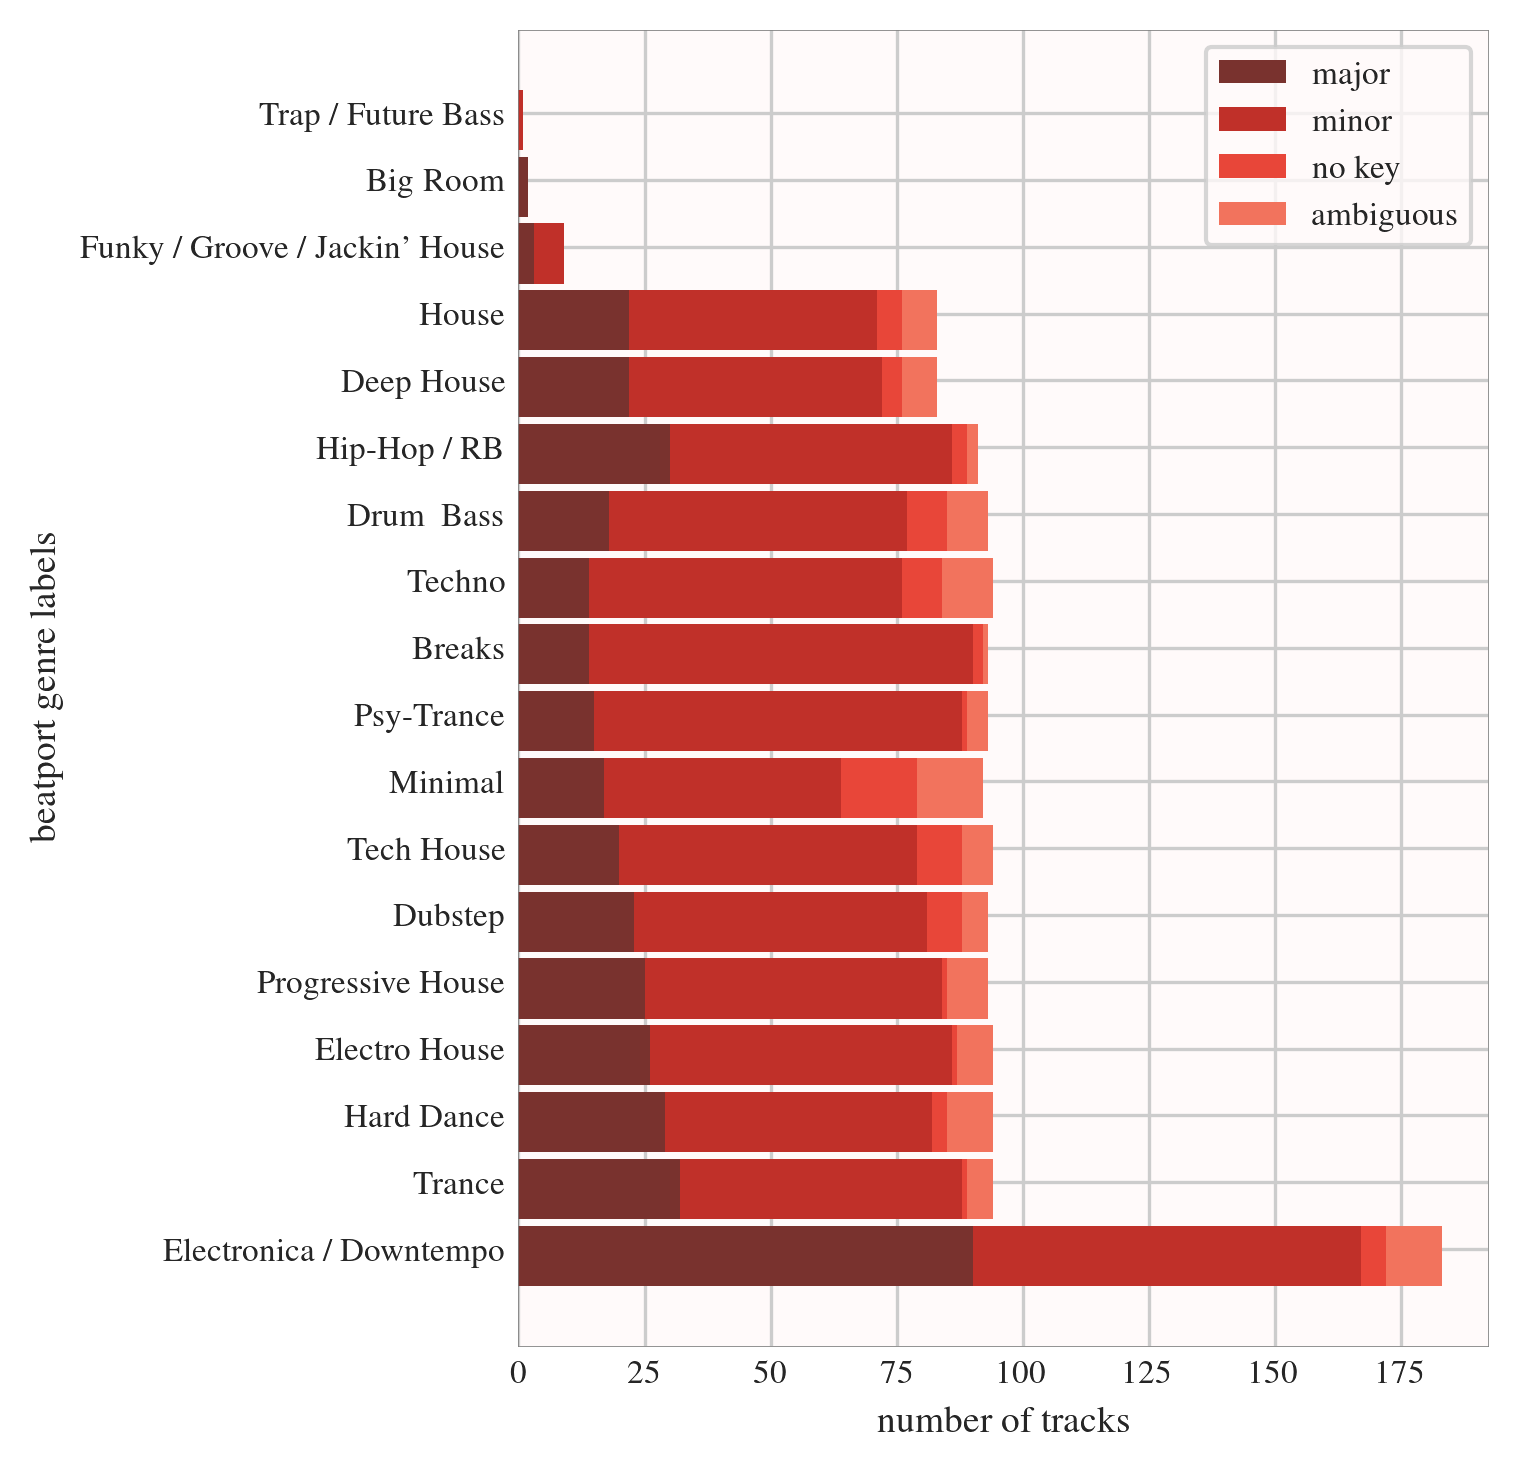

In [8]:
name="bpgenres" 
output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/"
    
major = np.array(np.column_stack(gen)[1].astype(np.int))
minor = np.array(np.column_stack(gen)[2].astype(np.int))
nokey = np.array(np.column_stack(gen)[3].astype(np.int))
other = np.array(np.column_stack(gen)[4].astype(np.int))
    
total_maj = np.sum(major)
total_min = np.sum(minor)
total_nokey = np.sum(nokey)
total_other = np.sum(other)

total_items = total_maj + total_min + total_nokey + total_other

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 5), dpi=150)

plt.ylabel('beatport genre labels')
#plt.ylim((-1, 10))
plt.xlabel('number of tracks')
plt.yticks(np.add(range(len(gen)), 0.1), np.column_stack(gen)[5].astype(str))
plt.barh(range(len(gen)), major, height=0.9, label='major', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), minor, height=0.9, left=major, label='minor', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), nokey, height=0.9, left=major+minor, label='no key', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), other, height=0.9, left=major+minor+nokey, label='ambiguous', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=1200)

402
903
57


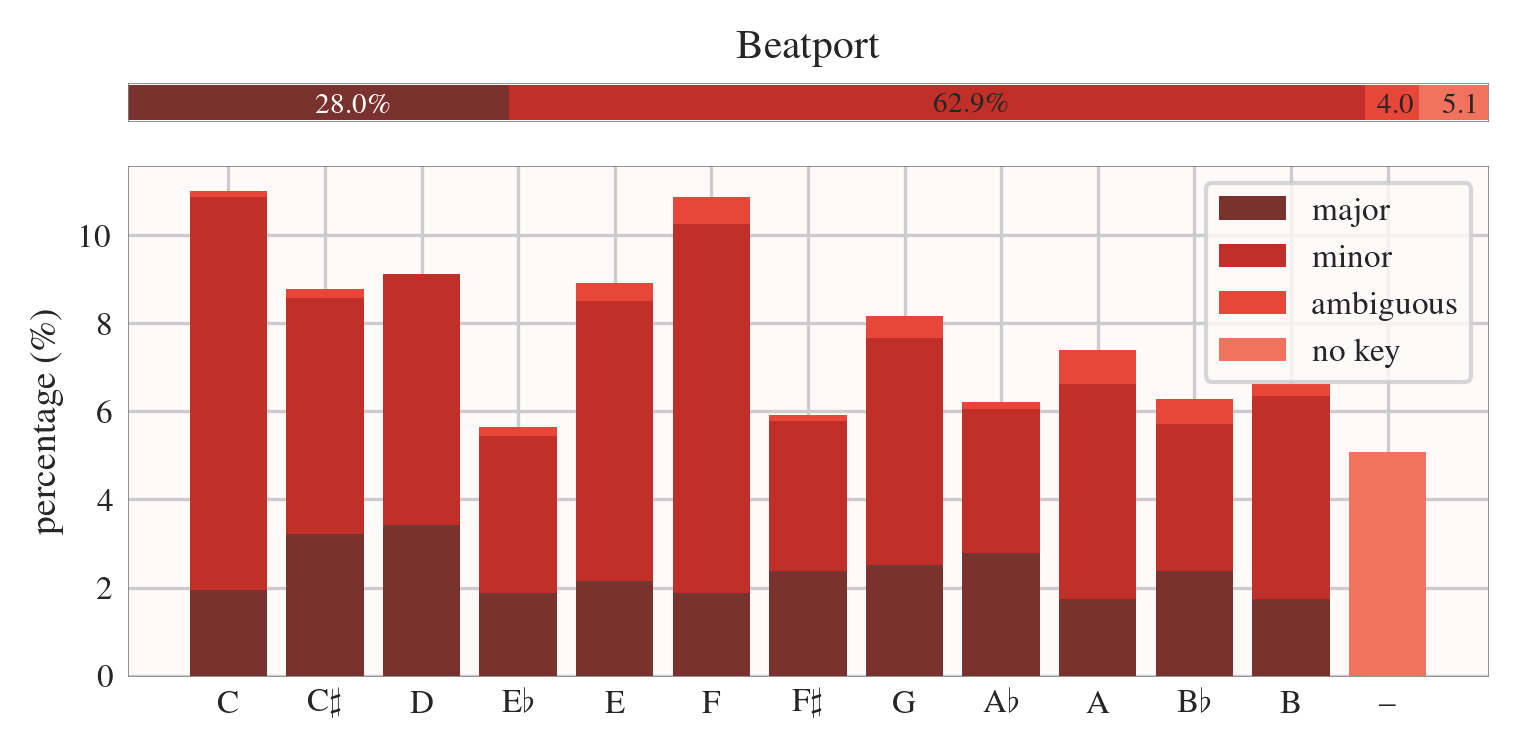

In [11]:
name = "Beatport"
# redefinir función para acomodar "others"
#       C     c#   d  d#   e    f    f#   g    g#    a   a#   b
major = [28,  46, 49, 27, 31,  27,  34, 36,   40,   25,  34,   25]
minor = [128, 77, 82,  51, 91, 120,  49, 74,  47,   70,  48,  66]
other = [  2,  3,  0,   3,  6,   9,  2,   7,   2,   11,   8,   4]
print np.sum(major)
print np.sum(minor)
print np.sum(other)
no_key = 73

total_maj = np.sum(major)
total_min = np.sum(minor)
total_other = np.sum(other)
total_items = total_maj + total_min + no_key + total_other
percentage_factor = 100.00 / total_items
percentage_major = np.multiply(major, percentage_factor)
percentage_minor = np.multiply(minor, percentage_factor)
percentage_other = np.multiply(other, percentage_factor)
percentage_no_key = np.multiply(no_key, percentage_factor)

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 2.6), dpi=150)

gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[0.9, 12])
ax = plt.subplot(gs[0])
a = ax.barh(0, total_maj, linewidth=0.0, edgecolor=(.1, .1, .1))
b = ax.barh(0, total_min, left=total_maj, linewidth=0.0, edgecolor=(.1, .1, .1))
c = ax.barh(0, total_other, left=total_min+total_maj, linewidth=0.0, edgecolor=(.1, .1, .1))
d = ax.barh(0, no_key, left=total_min+total_maj+total_other,  linewidth=0.0, edgecolor=(.1, .1, .1))
plt.xlim((0, total_items))
plt.xticks([])
plt.yticks([])
plt.title(name, fontsize=10)

for r in a:
    pmaj = "%.1f" % (total_maj * percentage_factor)
    str_l = len(pmaj) + 1
    plt.text((total_maj * 0.5) - (str_l * 0.8), -0.25, pmaj  + '\%', fontsize=7, color='white')

for r in b:
    pmin = "%.1f" % (total_min * percentage_factor)
    str_l = len(pmin) + 1
    plt.text(total_maj + (total_min * 0.5) - (str_l * 0.8), -0.25, pmin + '\%', fontsize=7)

for r in c:
    pother = "%.1f" % (total_other * percentage_factor)
    str_l = len(pother) + 1
    plt.text(total_maj + total_min + (total_other * 0.5) - (str_l * 4), -0.25, pother, fontsize=7)

for r in d:
    pnk = "%.1f" % (no_key * percentage_factor)
    if no_key * percentage_factor > 3:
        str_l = len(pnk) + 1
        plt.text(total_maj + total_min + total_other + (no_key * 0.5) - (str_l * 3), -0.25, pnk, fontsize=7)

plt.subplot(gs[1])
plt.ylabel('percentage (\%)')
plt.xticks(range(13), (r'C', r'C$\sharp$', r'D', r'E$\flat$', r'E', r'F', r'F$\sharp$', r'G', r'A$\flat$', r'A', r'B$\flat$', r'B', r'--'))
plt.bar(range(12), percentage_major, label='major', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(12), percentage_minor, bottom=percentage_major, label='minor', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(12), percentage_other, bottom=np.add(percentage_major,percentage_minor), label='ambiguous', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(12, percentage_no_key, label='no key', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join("/Users/angel/Dropbox/Apps/Texpad/Thesis/figures//bp_keys.pdf"), format="pdf", dpi=1200)

In [12]:
# check manually for keys... by using conditionals
t = d[(d.key1.str.contains('other') == True)]# & (d.key1.str.contains('\|') == True)]
t.key1.value_counts()

AttributeError: 'BarContainer' object has no attribute 'key1'

In [ ]:
# subdataframe con genres
mg = m.filter(['filename', 'id', 'genres'])

# imprime sólo entradas pertenecientes a un género
mg[mg.genres=="Big Room"]

# para retornar filas con la substring seleccionada en el campo seleccionado
mg[mg.genres.str.contains('Trap')==True]

# para retornar filas con un campo determinado
mg[mg.genres=="Big Room"]

# retorna el numero de entradas conteniendo substring en campo
d.key1.str.contains('minor').value_counts()

# distribución por géneros
n.genres.value_counts()

# distribución por keys
d.key1.value_counts()